In [2]:
from tensorflow import keras

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mnist = keras.datasets.mnist

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Text(1, 1, 'Label : 7')

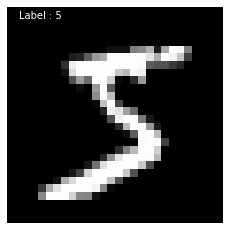

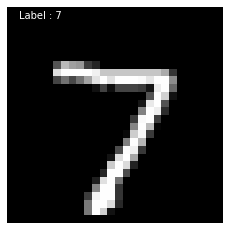

In [18]:
plt.rcParams['toolbar'] = 'None'
fg1 = plt.figure(1, figsize=(3, 3))
# fg1.canvas.window().statusBar().setVisible(False)
ax1 = fg1.add_axes([0, 0, 1, 1])
ax1.imshow(train_images[0], cmap='gray', aspect='auto')
ax1.axis('off')
ax1.text(1, 1, "Label : {}".format(train_labels[0]), fontsize=10, color='white')

fg2 = plt.figure(2, figsize=(3, 3)) 
# fg2.canvas.window().statusBar().setVisible(False)
ax2 = fg2.add_axes([0, 0, 1, 1])
ax2.imshow(test_images[0], cmap='gray', aspect='auto')
ax2.axis('off')
ax2.text(1, 1, "Label : {}".format(test_labels[0]), fontsize=10, color='white')

In [24]:
# normalize
train_input = train_images 
test_input = test_images

In [19]:
train_target = keras.utils.to_categorical(train_labels)
test_target = keras.utils.to_categorical(test_labels)

In [21]:
model = keras.Sequential(
    layers=[
keras.layers.Flatten(input_shape=(28, 28), name='Input'), keras.layers.Dense(128, activation='sigmoid', name='Hidden_1'), keras.layers.Dense(128, activation='sigmoid', name='Hidden_2'), keras.layers.Dense(128, activation='sigmoid', name='Hidden_3'), keras.layers.Dense(10, activation='sigmoid', name='Output')
],
    name="MNIST_Classifer"
)
model.summary()

Model: "MNIST_Classifer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
Hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.2),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [25]:
model.fit(train_input, train_target, epochs=20, verbose=2)

Epoch 1/20
1875/1875 - 1s - loss: 0.0900 - accuracy: 0.1737
Epoch 2/20
1875/1875 - 1s - loss: 0.0837 - accuracy: 0.3309
Epoch 3/20
1875/1875 - 1s - loss: 0.0707 - accuracy: 0.4960
Epoch 4/20
1875/1875 - 1s - loss: 0.0534 - accuracy: 0.6662
Epoch 5/20
1875/1875 - 1s - loss: 0.0414 - accuracy: 0.7897
Epoch 6/20
1875/1875 - 1s - loss: 0.0331 - accuracy: 0.8539
Epoch 7/20
1875/1875 - 1s - loss: 0.0266 - accuracy: 0.8805
Epoch 8/20
1875/1875 - 1s - loss: 0.0220 - accuracy: 0.8957
Epoch 9/20
1875/1875 - 1s - loss: 0.0189 - accuracy: 0.9041
Epoch 10/20
1875/1875 - 1s - loss: 0.0171 - accuracy: 0.9101
Epoch 11/20
1875/1875 - 1s - loss: 0.0156 - accuracy: 0.9175
Epoch 12/20
1875/1875 - 1s - loss: 0.0146 - accuracy: 0.9205
Epoch 13/20
1875/1875 - 1s - loss: 0.0137 - accuracy: 0.9246
Epoch 14/20
1875/1875 - 1s - loss: 0.0130 - accuracy: 0.9279
Epoch 15/20
1875/1875 - 1s - loss: 0.0127 - accuracy: 0.9301
Epoch 16/20
1875/1875 - 1s - loss: 0.0123 - accuracy: 0.9324
Epoch 17/20
1875/1875 - 1s - loss

In [27]:
test_loss, test_acc = model.evaluate(test_input, test_target, verbose=2) 
print('\nTest accuracy:', test_acc)
predictions = model.predict(test_input)

313/313 - 0s - loss: 0.0110 - accuracy: 0.9360

Test accuracy: 0.9359999895095825


(-0.5, 27.5, 27.5, -0.5)

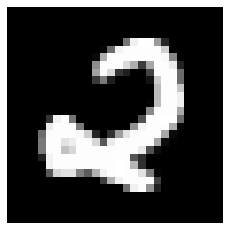

In [28]:
sample_idx = 4415

test_sample = test_input[sample_idx].reshape([1, 28, 28])
test_sample_label = test_labels[sample_idx]

fg3 = plt.figure(3, figsize=(3, 3))
ax3 = fg3.add_axes([0, 0, 1, 1])
ax3.cla()
ax3.imshow(test_input[sample_idx], cmap='gray', aspect='auto')
ax3.axis('off')


In [31]:
sample_pred = model.predict(test_sample)
sample_result = np.argmax(sample_pred)

In [32]:
ax3.text(0.5, 2.5, "Label : {}".format(test_sample_label), fontsize=20, color='white')
ax3.text(0.5, 5.5, "Prediction : {}".format(sample_result), fontsize=20, color='red')

Text(0.5, 5.5, 'Prediction : 2')